# Inteligência Artificial - Trabalho
- Universidade Federal de Santa Catarina
- Departamento de Automação e Sistemas
- Prof. Eric Aislan Antonelo

### Grupo
-

### Opção: 1

#### 1. Implementação:
- Crie as estruturas de dados para guardar os pesos que definem uma arquitetura
de rede neural multi-camadas. Inicialize a rede neural aleatoriamente.
- Implemente o algoritmo da retropropagação para o cálculo do gradiente, a
derivada parcial da função de custo com relação aos pesos da rede.
- Valide o algoritmo do cálculo do gradiente, realizando uma aproximação numérica
do mesmo. Verifique se os cálculos batem um com o outro.
- Dado o gradiente já calculado, implemente o método do descenso do gradiente
para o treinamento da rede neural, ou seja, o processo de ajuste dos pesos.

#### 2. Aplicação:
- Use o código implementado para treinar uma rede neural para realizar a classificação de um padrão de duas dimensões de entrada. Os dados para treinamento
estão disponíveis no arquivo
classification2.txt.
Para plotar a fronteira de decisão da rede treinada, poderá usar o código
disponível no link
https://colab.research.google.com/drive/1XTtZGgpAefbiWejTrEjsnWzS_
XXYdzff?usp=sharing.
- Relate resultados variando pelo menos duas vezes cada um dos hiperparâmetros: o número de camadas; o número de neurônios por camada; taxa de aprendizagem. Use métricas como taxa de classificação (porcentagem de predições
corretas) no conjunto de validação (exemplos não usados no treinamento).
- (opcional) Treine uma rede neural para classificar dígitos a partir de imagens
como entrada para a rede. Use o arquivo
classification3.mat.

#### 3. Entregas:
No relatório a ser entregue, descreva os experimentos e os resultados obtidos.
Grave um video de até 3 minutos, onde você deve explicar o código implementado
de uma forma geral, as dificuldades encontradas, e em especial:
- a parte do código referente ao cálculo do gradiente
- a parte do código referente ao gradient descent
- o gráfico da fronteira de decisão
Entregue o código, PDF do relatório e o arquivo de video pelo Moodle (zipado com
ZIP ou tar.gz).

In [1]:
import pandas as pd
import numpy as np
import sys
import logging
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from numpy import genfromtxt
from sklearn.preprocessing import StandardScaler

logger = logging.getLogger()
logger.setLevel(logging.INFO)
formatter = logging.Formatter('%(message)s')

stdout_handler = logging.StreamHandler(sys.stdout)
stdout_handler.setFormatter(formatter)

logger.addHandler(stdout_handler)

### Data source

In [2]:
df = pd.read_csv('classification2.txt', header=None)
df.columns = ['column1', 'column2', 'label']
df.info()
print(f'\nLabel Value counts: \n{df.label.value_counts()}')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   column1  118 non-null    float64
 1   column2  118 non-null    float64
 2   label    118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB

Label Value counts: 
0    60
1    58
Name: label, dtype: int64


,column1,column2,label
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


### Correlation Matrix

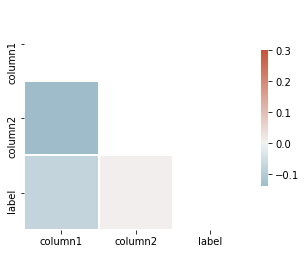

In [3]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(5, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(
    corr, mask=mask, cmap=cmap, vmax=.3, center=0,
    square=True, linewidths=.2, cbar_kws={"shrink": .5}
)
plt.show()

In [4]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1]
y = y.values.reshape(y.shape[0], 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#standardize the dataset
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [5]:
#X_train = genfromtxt('X_train.csv', delimiter=',')
#X_test = genfromtxt('X_test.csv', delimiter=',')
#y_train = genfromtxt('y_train.csv', delimiter=',')
#y_train = y_train.reshape(y_train.shape[0], 1)
#y_test = genfromtxt('y_test.csv', delimiter=',')
#y_test = y_test.reshape(y_test.shape[0], 1)

In [6]:
def print_metrics(y, preds):
    print(f'F1 : {f1_score(y, preds)}')
    print(f'Accuracy: {accuracy_score(y, preds)}')

### Neural net data structure

In [7]:
# To ADD / REMOVE bias
#self.input_length = input_length# + 1

#biased_input_data = np.ones((input_data.shape[0], input_data.shape[1] + 1))
#biased_input_data[:, :-1] = input_data

#next_activation = np.append(next_activation, 1)

#previous_deltas = new_deltas[:-1] # Exclude bias delta


In [8]:
np.random.randn(5) - 0.5

array([-0.26554945, -0.44473915, -1.637316  , -1.62845593, -1.83601042])

In [9]:
np.random.uniform(-0.5, 0.5, 5)

array([ 0.10653021, -0.21629706,  0.19522861, -0.07858873, -0.22173954])

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x

class Neuron():
    def __init__(self, input_length):
        self.__weights = self.create_random_weights(input_length)
        
    def create_random_weights(self, input_length):
        #return np.random.uniform(-0.5, 0.5, input_length)
        return np.random.randn(input_length) - 0.5
        
    @property
    def weights(self):
        return self.__weights
    
    @weights.setter
    def weights(self, new_value):
        self.__weights = new_value
    
    def __repr__(self):
        return f'Neuron {self.weights}'
    
class Layer():
    def __init__(self, input_length, n_neurons):
        self.input_length = input_length + 1 # input_length + bias_length
        self.n_neurons = n_neurons
        self.create_neurons()
        self.dd = np.zeros((self.n_neurons, self.input_length))
    
    def create_neurons(self):
        """Creates neurons of layer
        """
        self.neurons = list()
        for i in range(self.n_neurons):
            self.neurons.append(
                Neuron(self.input_length)
            )
            
    def __repr__(self):
        return f'Layer \n{self.weights_matrix}'
    
    @property
    def weights_matrix(self):
        """Represents layer's weights as a matrix, where each column is a neuron.
        """
        return np.array([n.weights for n in self.neurons])
    
    @weights_matrix.setter
    def weights_matrix(self, new_weights):
        for neuron_i, neuron in enumerate(self.neurons):
            neuron.weights = new_weights[neuron_i]
    
    def transform(self, input_data, activation_function):
        """Calculates layer output based on input data
        """
        
        # Include bias
        biased_input_data = np.ones((input_data.shape[0], input_data.shape[1] + 1))
        biased_input_data[:, :-1] = input_data
        #print('X')
        #print(input_data.shape)
        #print(input_data)
        #print('W')
        #print(self.weights_matrix.shape)
        #print(self.weights_matrix.T)
        self.z = np.dot(biased_input_data, self.weights_matrix.T)
        #print('Z')
        #print(self.z)
        #print('Activ func')
        #print(activation_function)
        self.activation = activation_function(self.z)
        #print('A')
        #print(self.activation)
        return self.activation

class NeuralNet():
    def __init__(self, *layers, learning_rate=0.1, epochs=5,
                 activation_function=relu, der_activation_function=relu_derivative,
                 last_layer_activation_function=sigmoid, last_layer_der_activation_function=sigmoid_derivative,
                ):
        self.layers = layers
        self.learning_rate = learning_rate
        self.costs = list()
        self.epochs = epochs
        self.activation_function = activation_function
        self.der_activation_function = der_activation_function
        self.last_layer_activation_function = last_layer_activation_function
        self.last_layer_der_activation_function = last_layer_der_activation_function
    
    def transform(self, X):
        X_transformed = X.copy()
        for layer in self.layers[:-1]:
            X_transformed = layer.transform(X_transformed, activation_function=self.activation_function)

        X_transformed = self.layers[-1].transform(
            X_transformed,
            activation_function=self.last_layer_activation_function
        )
        return X_transformed.reshape(X.shape[0])
    
    def __repr__(self):
        return f'Neural Net \n{self.weights_matrix}'
    
    @property
    def weights_matrix(self):
        """Represents layer's weights as a matrix, where each column is a neuron.
        """
        return np.array([l.weights_matrix for l in self.layers], dtype=object)

    @weights_matrix.setter
    def weights_matrix(self, new_weights):
        for layer_i, layer in enumerate(self.layers):
            layer.weights_matrix = new_weights[layer_i]
    
    def cost_2(self, X, y):
        hx = self.transform(X)
        return 0.5 * np.sum((np.subtract(y.reshape(len(y)), hx) ** 2)) / X.shape[0]
            
    def cost(self, X, y):
        hx = self.transform(X)
        y_reshaped = y.reshape(len(y))
        
        log1_hx = np.log(hx)
        log2_hx = np.log(1 - hx)
        
        y_1 = y_reshaped * log1_hx
        y_0 = (1 - y_reshaped) * log2_hx

        return -np.sum(
            y_1 + y_0
        ) / X.shape[0]
    
    def has_next_item(self, list_, index_):
        return (index_ + 1) == len(list_)

    def backpropagate(self, sample, sample_i, hxi, label):
        logger.debug(f'\n\n+++++++++++++++')
        logger.debug(f'Starting backpropagration\n')
        logger.debug(f'Sample {sample}')
        logger.debug(f'Hxi {hxi}')
        logger.debug(f'Label {label}')
        
        reversed_layers = self.layers[::-1]
        #previous_deltas = hxi - label
        previous_deltas = - np.divide(label, max(hxi, 0.00001)) + np.divide(1 - label, max(1 - hxi, 0.00001))
        
        logger.debug(f'Initial dds: \n{previous_deltas}\n')
        
        der_act_function = self.last_layer_der_activation_function
        for layer_i, layer in enumerate(reversed_layers):
            logger.debug(f'\n-----------------')
            logger.debug(f'Index {layer_i}, {layer}\n')
            
            # Get activation from next layer
            if self.has_next_item(reversed_layers, layer_i):
                next_activation = sample
            else:
                next_layer = reversed_layers[layer_i + 1]
                next_activation = next_layer.activation[sample_i]
            
            # Add bias to activation
            next_activation = np.append(next_activation, 1)
            
            # Multiply weights with deltas
            transposed_weights = layer.weights_matrix.T
            
            logger.debug(f'Weights: \n{layer.weights_matrix}')
            logger.debug(f'Transposed weights: \n{transposed_weights}')
            logger.debug(f'Previous deltas: \n{previous_deltas}\n')

            weights_dot_delta = np.dot(transposed_weights, previous_deltas)
            logger.debug(f'Transposed Weights dot delta: \n{weights_dot_delta}')
            
            # Calculate activation function derivative
            der_act_function_result = der_act_function(next_activation)
            logger.debug(f'Next layer activation: \n{next_activation}')
            logger.debug(f'Activation function derivative: \n{der_act_function_result}\n')
        
            # Calculate new deltas
            new_deltas = weights_dot_delta * der_act_function_result
            logger.debug(f'New deltas: \n{new_deltas}\n')
            
            # Calculate cost derivative
            dd = np.outer(previous_deltas, next_activation)
            layer.dd += dd
            previous_deltas = new_deltas[:-1] # Exclude bias delta
            logger.debug(f'Error derivative: \n{dd}')
            logger.debug(f'Layer error derivative: \n{layer.dd}')
            logger.debug('\n')
            
            der_act_function = self.der_activation_function
                
        
    def fit(self, X, y):
        logger.info(f'Fitting')
        cost_mse = list()
        for epoch in range(self.epochs):
            hx = self.transform(X)
            if epoch % 50 == 0:
                logger.info(f'Running epoch {epoch}')
                
                plt.plot(self.costs)
                plt.title('Cross entrophy cost')
                plt.ylabel('Cost')
                plt.xlabel('Epoch')
                plt.show()

                plt.plot(cost_mse)
                plt.title('Mean squared cost')
                plt.ylabel('Cost')
                plt.xlabel('Epoch')
                plt.show()
    
            #print(hx)
            for sample_i, sample in enumerate(X):
                #logger.info(f'\n\nBackProp')
                self.backpropagate(sample, sample_i, hx[sample_i], y[sample_i])

            for layer_i, layer in enumerate(self.layers):
                #logger.info(f'Layer {layer_i} {layer}')
                #logger.info(f'Error der \n{layer.dd}')
                #logger.info('')
                layer.weights_matrix -= self.learning_rate * layer.dd / len(X)
                
            self.costs.append(self.cost(X, y))
            cost_mse.append(self.cost_2(X, y))
        
        plt.plot(self.costs)
        plt.title('Cross entrophy cost')
        plt.ylabel('Cost')
        plt.xlabel('Epoch')
        plt.show()
        
        plt.plot(cost_mse)
        plt.title('Mean squared cost')
        plt.ylabel('Cost')
        plt.xlabel('Epoch')
        plt.show()

In [11]:
#logger.setLevel(logging.DEBUG)
logger.setLevel(logging.INFO)

layers = [
    Layer(input_length=X_train.shape[1], n_neurons=5),
    Layer(input_length=5, n_neurons=5),
    Layer(input_length=5, n_neurons=1),
]

np.random.seed(1) # Seed the random number generator
nn = NeuralNet(*layers, learning_rate=0.001, epochs=1000,
                activation_function=sigmoid, der_activation_function=sigmoid_derivative,
                last_layer_activation_function=sigmoid, last_layer_der_activation_function=sigmoid_derivative,
              )

#nn.weights_matrix = [
#    np.array(
#        [
#            [1.62434536, -1.07296862],
#            [-0.61175641, 0.86540763],
#            [-0.52817175, -2.3015387 ]
#        ],
#    ),
#    np.array([
#        [ 1.74481176, -0.7612069 ,  0.3190391]
#    ])
#]
print(nn)
#print(f'Initial cost: {nn.cost(X_train, y_train)}')

Neural Net 
[array([[ 0.39100599,  1.69654285, -0.22064184],
        [-0.73142593,  1.32091858, -0.07081591],
        [-0.5112272 , -1.09290782, -0.53001744],
        [-0.6520169 , -2.45825003,  0.70646691],
        [-1.05886228, -1.32661479,  0.72671657]])
 array([[-0.89944973,  0.77940702,  0.27705458,  0.55866929, -1.33153794,
         -0.29771758],
        [ 0.35831091, -0.96375038, -1.56375862, -1.74054074,  0.12103202,
         -0.3383158 ],
        [-1.43041328, -1.07955413, -2.05341388, -0.44684229, -0.2181158 ,
          0.40048665],
        [-0.91324277, -1.41893976, -0.01082349, -0.81954364,  1.15580838,
         -0.64158843],
        [ 1.0102559 , -0.2725214 , -0.26977261,  0.09692159,  0.62706217,
         -0.41337574]])
 array([[-1.38362841, -2.12515024, -1.20026018,  0.99426188,  0.66613252,
         -0.33201605]])                                                  ]


Fitting
Running epoch 0


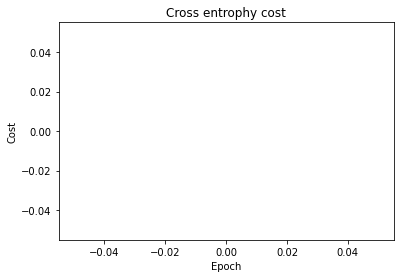

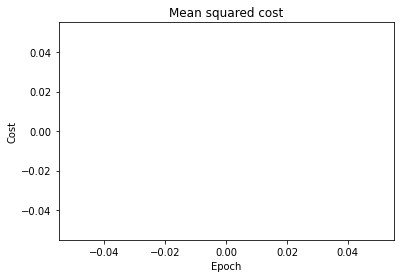

Running epoch 50


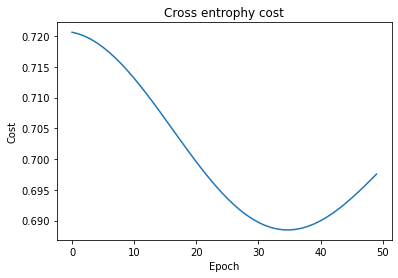

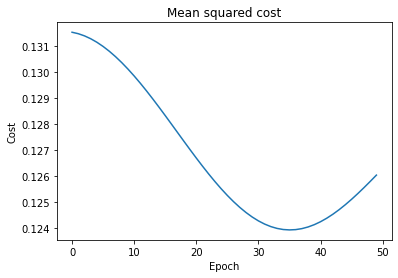

Running epoch 100


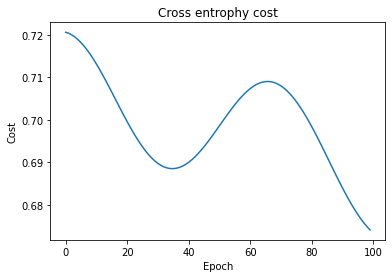

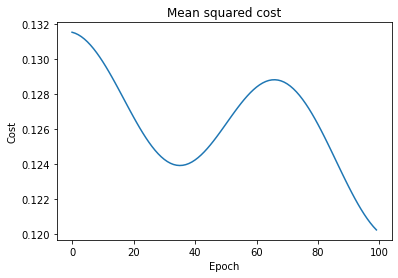

Running epoch 150


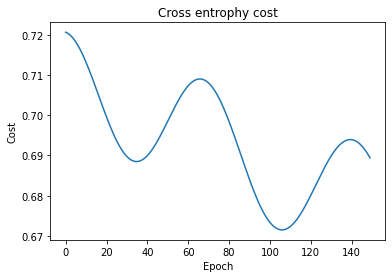

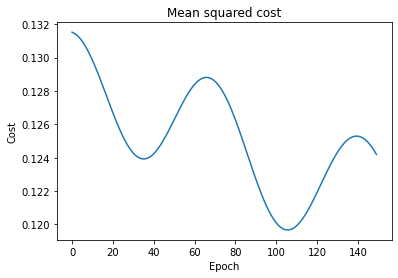

Running epoch 200


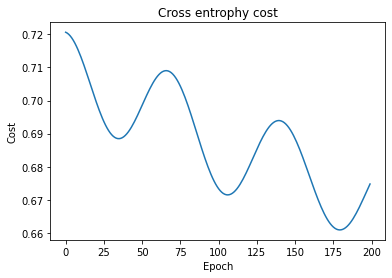

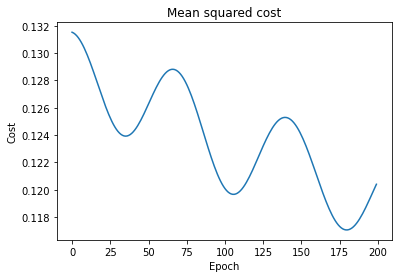

Running epoch 250


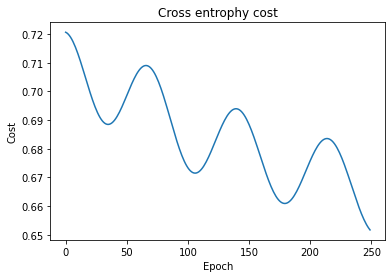

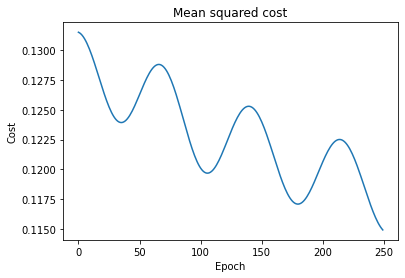

Running epoch 300


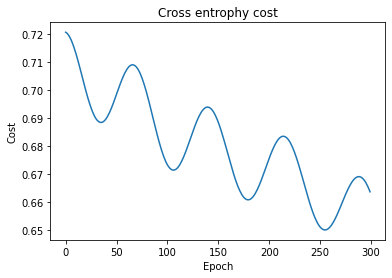

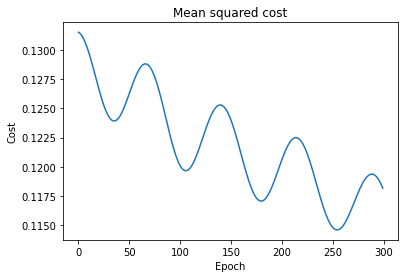

Running epoch 350


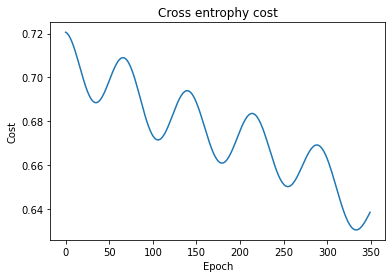

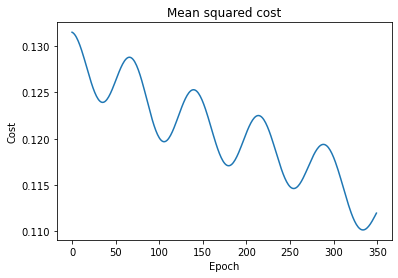

Running epoch 400


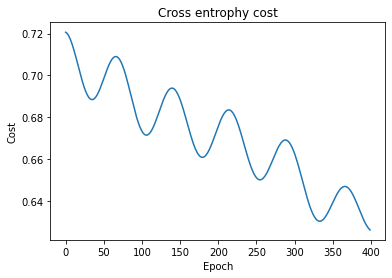

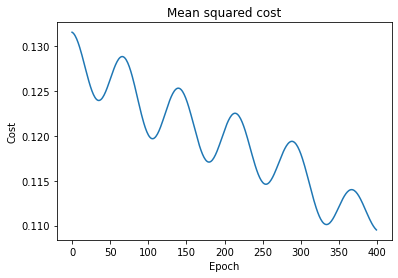

Running epoch 450


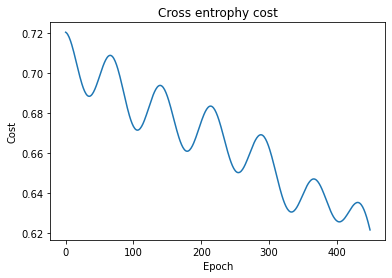

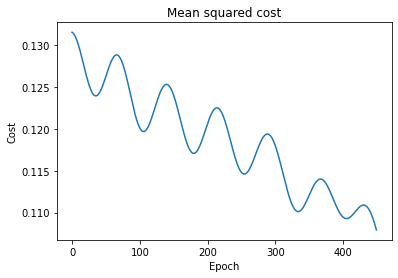

Running epoch 500


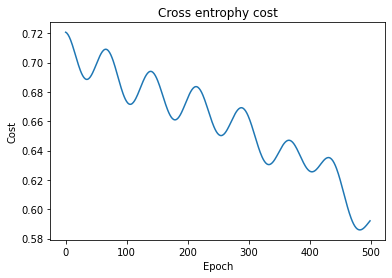

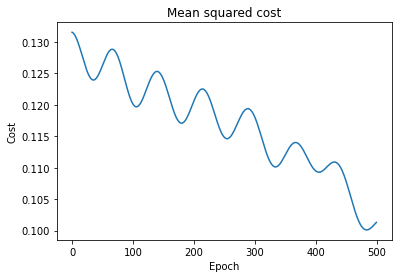

Running epoch 550


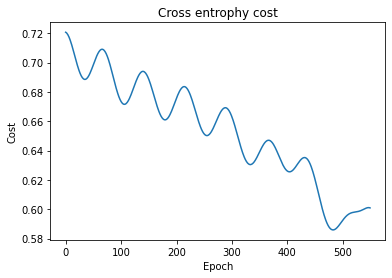

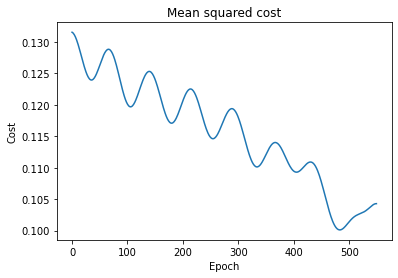

Running epoch 600


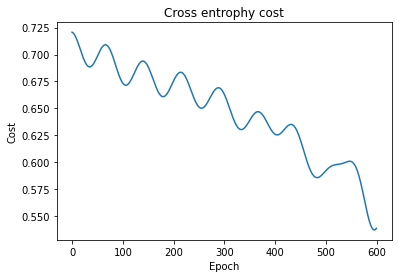

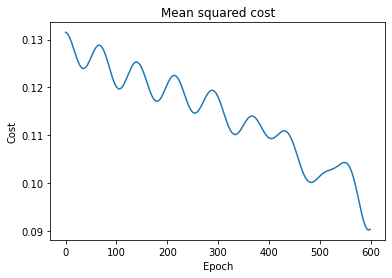

Running epoch 650


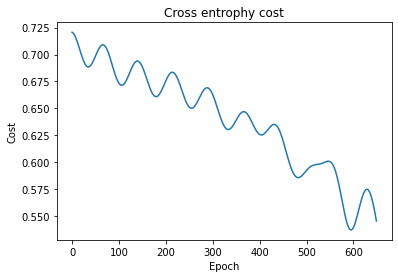

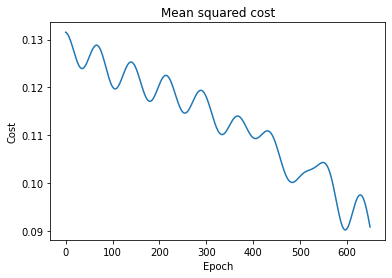

Running epoch 700


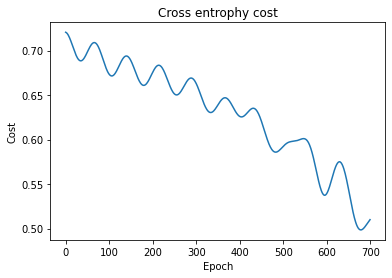

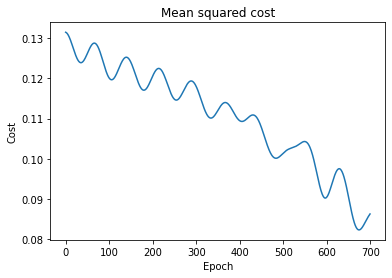

Running epoch 750


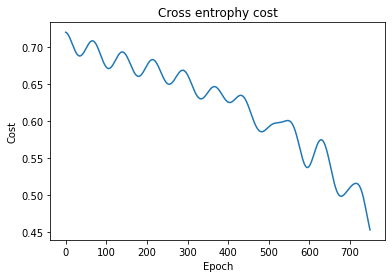

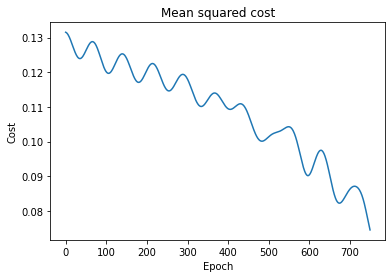

Running epoch 800


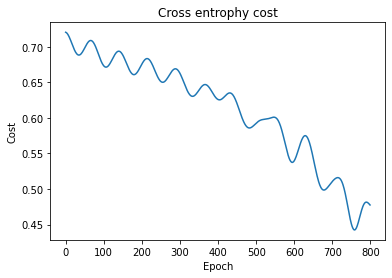

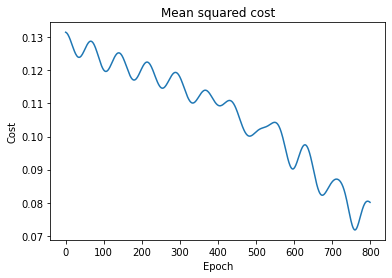

Running epoch 850


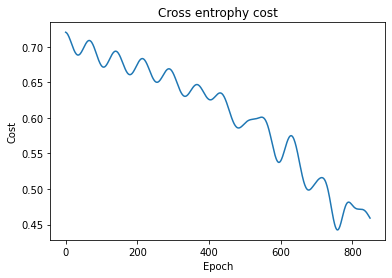

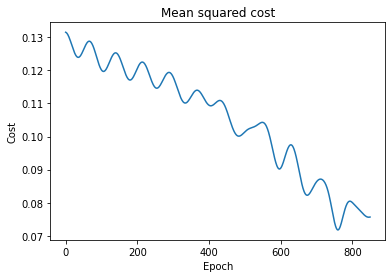

Running epoch 900


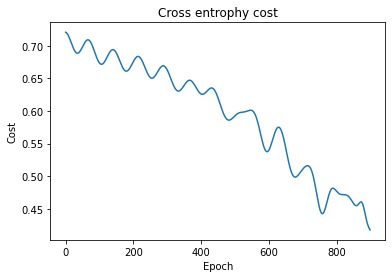

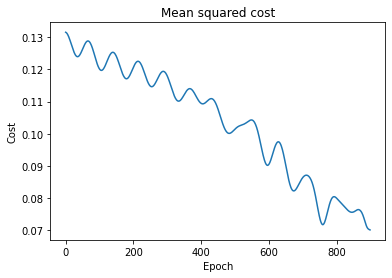

Running epoch 950


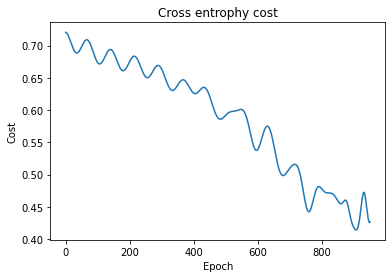

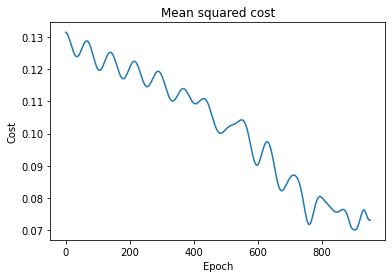

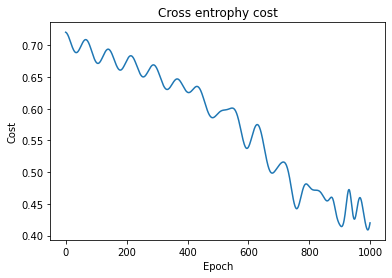

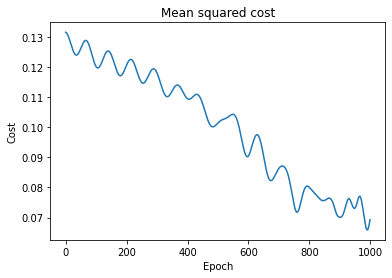

In [12]:
nn.fit(X_train, y_train)
nn_preds = nn.transform(X_test)
nn_preds_round = nn_preds.round()

In [13]:
print_metrics(y_test, nn_preds_round)
nn_preds_round

F1 : 0.7804878048780488
Accuracy: 0.75


array([1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 0.])

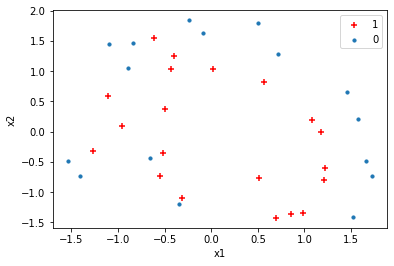

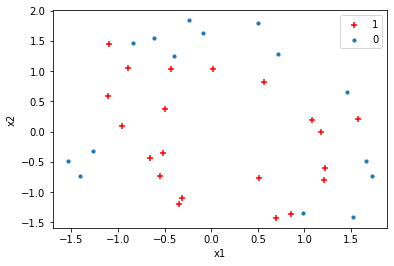

In [14]:
def plot_outputs(X, y):
    plt.scatter(X[y==1,0],X[y==1,1],c="r",marker="+")
    plt.scatter(X[y==0,0],X[y==0,1],marker="o",s=10)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend(["1","0"],loc=0)
    plt.show()
    
plot_outputs(X_test, y_test.reshape((len(y_test))))
plot_outputs(X_test, nn_preds_round)

In [ ]:
cls = LogisticRegression()
cls.fit(X_train, y_train.ravel())
lr_preds = cls.predict(X_test)
print('LogisticRegression')
print_metrics(y_test.ravel(), lr_preds)

cls = MLPClassifier()
cls.fit(X_train, y_train.ravel())
mlp_preds = cls.predict(X_test)
print('MLPClassifier')
print_metrics(y_test.ravel(), mlp_preds)

In [ ]:
# add header names
headers =  ['age', 'sex','chest_pain','resting_blood_pressure',  
        'serum_cholestoral', 'fasting_blood_sugar', 'resting_ecg_results',
        'max_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',"slope of the peak",
        'num_of_major_vessels','thal', 'heart_disease']

heart_df = pd.read_csv('heart.csv', names=headers, skiprows=range(1))

X = heart_df.iloc[:, :-1]
y = heart_df.iloc[:, -1].values.reshape(X.shape[0], 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"Shape of train set is {X_train.shape}")
print(f"Shape of test set is {X_test.shape}")
print(f"Shape of train label is {y_train.shape}")
print(f"Shape of test labels is {y_test.shape}")

In [ ]:
###############
##### Plotando fronteira de decisão não-linear
###############

import numpy as np
import matplotlib.pyplot as plt

# Plotando fronteira de decisão
x1s = np.linspace(-1,1.5,50)
x2s = np.linspace(-1,1.5,50)
z = np.zeros((len(x1s),len(x2s)))

z = theta.T * x

for i in range(len(x1s)):
    for j in range(len(x2s)):
        z[i,j] =  # saida do modelo antes de aplicar a função sigmoide 
plt.contour(x1s,x2s,z.T,0)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc=0)